## Illustration of the simple wrapper for uvspec_etc 

First, import the wrapper function for obtaining UVI SNR from basic inputs 

In [1]:
from syotools.wrappers.uvspec import uvspec_snr

In [2]:
help(uvspec_snr)

Help on function uvspec_snr in module syotools.wrappers.uvspec:

uvspec_snr(telescope, mode, template, fuvmag, exptime)
    Run a basic SNR calculation that takes in a telescope, 
    spectral template, normalization magnitude, and exposure 
    time to compute SNR. For converting magnitude, template, 
    and SNR to a desired exposure time, use uvspec_exptime.py 
    
    usage: 
      wave, snr, uvi = uvspec_snr(telescope, mode, template, uvmag, exptime) 
    
      positional arguments:
    
       1-telescope = 'EAC1', 'EAC2', or 'EAC3'. This argument is a string. 
         EAC1 = 6 m inner diameter, 7.2 outer diameter hex pattern, off-axis 
         EAC2 = 6 m diameter off-axis 
         EAC3 = 8 m diameter on-axis 
    
       2-mode = your choice of UVI grating, a string: 
            ['G120M', 'G150M', 'G180M', 'G155L', 'G145LL', 'G300M']
    
       3-template = your choice of spectral template: 
            ['flam', 'qso', 's99', 'o5v', 'g2v', 'g191b2b', 'gd71', 'gd153', 'ctt

In [3]:
wave120, snr120, uvi = uvspec_snr('EAC1', 'G120M', 'flat', 19, 3.) 
wave150, snr150, uvi = uvspec_snr('EAC1', 'G150M', 'flat', 19, 3.) 
wave180, snr180, uvi = uvspec_snr('EAC1', 'G180M', 'flat', 19, 3.) 

wave300, snr300, uvi = uvspec_snr('EAC1', 'G300M', 'flat', 19, 0.1) 

Warning, 5 of 20000 bins contained negative fluxes; they have been set to zero.


/Users/tumlinson/anaconda3/envs/hwotools/lib/python3.9/site-packages/pysynphot/units.py:824: RuntimeWarning: divide by zero encountered in log
  return -1.085736 * N.log(arg) + ABZERO


Warning, 3590 of 20000 bins contained negative fluxes; they have been set to zero.
Warning, 293 of 2920 bins contained negative fluxes; they have been set to zero.
Setting Telescope to:  EAC1
Current SED template: 
Current grating mode: G120M (R = 30,400)
Current exposure time: 3.0 hours

Setting Telescope to:  EAC1
Current SED template: 
Current grating mode: G150M (R = 37,800)
Current exposure time: 3.0 hours

Setting Telescope to:  EAC1
Current SED template: 
Current grating mode: G180M (R = 40,800)
Current exposure time: 3.0 hours

Setting Telescope to:  EAC1
Current SED template: 
Current grating mode: G300M (R = 28,000)
Current exposure time: 0.1 hours



/Users/tumlinson/anaconda3/envs/hwotools/lib/python3.9/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Text(0, 0.5, 'SNR per resolution element')

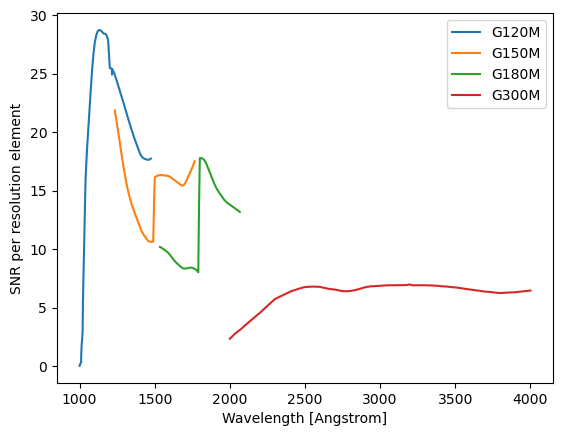

In [4]:
import matplotlib.pyplot as plt 

plt.plot(wave120, snr120, label='G120M')
plt.plot(wave150, snr150, label='G150M') 
plt.plot(wave180, snr180, label='G180M') 
plt.plot(wave300, snr300, label='G300M') 

plt.legend() 
plt.xlabel('Wavelength [Angstrom]') 
plt.ylabel('SNR per pixel') 

In [5]:
uvi.templates

AttributeError: 'Spectrograph' object has no attribute 'templates'